<a href="https://colab.research.google.com/github/Pavlo-Morozov/Natural-Language-Processing-Lyrics/blob/master/Lyrics_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural language Processing with music
I will try to show here the basics of working with NLP. To do this, we take the lyrics of different artists and try to see how they differ.

In [0]:
from bs4 import BeautifulSoup # For parsing through html pages and get necessary information
import requests               # To get html pages from url address
import re                     # Regular expression operations
import time                   # To make a pause if you need to stop parsing for a while
import pandas as pd           # To work with datasets

# Scraping lyrics
First we need to get the lyrics. You can find ready-made datasets, but sometimes you have to get texts directly from the site. To do this, we will write a simple parser using a beautiful soup.

##1) For each artist, we get a list of links to each song.
##2) From each link we get the lyrics

***Attention!*** If you catch an AttributeError ('NoneType' object has no attribute 'find_all') or a connection error - this may mean that you access the site too often. Reduce the number of requests and restart your notebook.
In this work, I used Google Colab. If you catch an error - try to press ***Runtime -> Factory reset runtime.*** This may not work the first time, then try several times.

In [0]:
'''You can use your own links if you want to try different artist. Just replace it below'''
url_list = [
            'https://www.azlyrics.com/m/metallica.html',
            'https://www.azlyrics.com/j/justinbieber.html',
            'https://www.azlyrics.com/b/billieeilish.html',
            'https://www.azlyrics.com/c/cash.html',
            'https://www.azlyrics.com/b/blacksabbath.html',
            'https://www.azlyrics.com/a/adele.html'
            ]

site='https://www.azlyrics.com'

dict_links = {} # make empty dictionary
def links_scrap(urls, site):
  links = []    # make empty list for links
  for url in urls:
    html = requests.get(url).text         # get all text from certain url page
    soup = BeautifulSoup(html, "html.parser")    # create Beautiful Soup object with link in your url_list

    '''To understand which author corresponds to which text of the song,
     we copy the author’s name from the link.
    You can write this list with your own hands, 
    but I like automation and you won’t have to do this if you want to change the list of authors.'''

    artist = url[27:].split(".html", maxsplit=1)[0] 
    for link in  soup.find(id="listAlbum").find_all('a'):  # find all song (id="listAlbum") links ('a') on artist page
      links.append(site + link.get("href").replace('https://www.azlyrics.com', '..')[2:]) # correct all links
      
    dict_links[artist] = links # for every artist add all links of the songs in the dictionary
    links = []                 # After for loop let's make the list of links empty so as not to copy the same links again


links_scrap(url_list, site)


In [3]:
print("Number of songs:")
for a in dict_links: print(a, len(dict_links[a]))
minimum_songs = [min(len(n) for n in dict_links.values())][0] # count artist with minimum number of songs
print('Minimum number of songs: ',minimum_songs)              # Because it would be dishonest to use a different number of songs for each author

Number of songs:
metallica 162
justinbieber 196
billieeilish 46
cash 851
blacksabbath 203
adele 56
Minimum number of songs:  46


In [4]:
data = {}
def text_scraper(dict_links):
  all_text = []
  # to del is part of every text on site which wee need to delete
  to_del = 'Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that.' 

  headers={
  'Referer': 'https://www.azlyrics.com',
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
          } # User info for request comand
  
  minimum_songs = 20 #if you need to change number of songs per artist (for example to use smaller portions)
                     # I used portions of 20 and saved them in a pickle
  for key in dict_links:
    links = dict_links[key][0:minimum_songs] # selcet number of songs to scrap for each artist
    for url in links:
      html = requests.get(url,headers = headers).text
      soup = BeautifulSoup(html, "html.parser")
      text = soup.find(class_="col-xs-12 col-lg-8 text-center") 
      text = text.find_all(text = True)   #Find all text in class_="col-xs-12 col-lg-8 text-center"
      output = ''
      for t in text:
      	if t.parent.name in 'div': # To better understand just click on the site with the text of the song F12 and see where the text is.
	      	output += '{} '.format(t)
      text = re.sub(to_del, "", output)  #Delete excess line
      text = text.split("MxM banner", maxsplit=1)[0] #delete trash
      text = text.replace('\n', ' ').replace('\r', '')
      all_text.append(text)  # save lyrics in list ρ(＾o^)♪
    data[key] = all_text     # Like in previous parser save all text for every artist
    print(key, '... scraping done!')
    all_text = []            

  

text_scraper(dict_links)
print("Artists in data: ", data.keys())

metallica ... scraping done!
justinbieber ... scraping done!
billieeilish ... scraping done!
cash ... scraping done!
blacksabbath ... scraping done!
adele ... scraping done!
Artists in data:  dict_keys(['metallica', 'justinbieber', 'billieeilish', 'cash', 'blacksabbath', 'adele'])


##Save your data in pickle
For convenience, we can save our data in a special file using a pickle. This is useful, for example, when a site refuses to issue a large number of requests. So you can save a small portion of data, reboot the notebook and load the next portion of data.

In [0]:
import pickle
# output = open('data.pkl', 'wb')  # Uncomment to load data in a pickle
# pickle.dump(data,output)

# output2 = open('data.txt', 'wb')
# pickle.dump(data,output2)

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys(): # Upload files from your computer to notebook
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_0-20.pkl to data_0-20.pkl
Saving data_21-40.pkl to data_21-40.pkl
User uploaded file "data_0-20.pkl" with length 159552 bytes
User uploaded file "data_21-40.pkl" with length 148911 bytes


In [0]:
with open('data_0-20.pkl', 'rb') as f: # Load data from pickles
  data1 = pickle.load(f)
with open('data_21-40.pkl', 'rb') as f:
  data2 = pickle.load(f)

In [0]:
# from google.colab import files  #uncomment if you want to download data.pkl file (in Google Colab)
# files.download('data.pkl')
# files.download('data.txt')

#Data Cleaning
A very important thing in data science is data cleansing. In order for the model algorithms to "understand" our data, the text needs to be cleared of punctuation and remove unnecessary stop words.

In [0]:
data = {**data1, **data2} # join little portions of data

In [0]:
def join_text(text):
  all_text = ' '.join(text)  # join every song to one big piece of text
  return all_text
data_joined = {key: [join_text(value)] for (key, value) in data.items()} # For every key in our dictionary join all values
                                                                         # Where key - artist; value - lyrics

In [63]:
pd.set_option('max_colwidth',200) # increase the column borders in the data table
data = pd.DataFrame.from_dict(data_joined).transpose() # get data in Pandas Data Frame format
data.columns = ['text'] # set name of column with lyrics as 'text'
data = data.sort_index()
data

,text
adele,Some say I'll be better without you But they don't know you like I do Or at least the sides I thought I knew I can't bear this time It drags on as ...
billieeilish,"It's not true, tell me I've been lied to Cryin' isn't like you What the hell did I do? Never been the type to Let someone see right through Maybe w..."
blacksabbath,Long ago I wandered through my mind In the land of fairy tales and stories Lost in happiness I knew no fears Innocence and love was all I knew It was ...
cash,"I got cotton in the bottom land It's up and growin' and I got a good stand My good wife and them kids of mine Gonna get new shoes, come Pickin' Time G..."
justinbieber,"(Never say never) (Pick it up this, pick it up) Yeah, yeah (Pick it up this, pick it up) Never, never, never, never, never, never (Pick it up this,..."
metallica,"Welcome to where time stands still No one leaves and no one will Moon is full, never seems to change Just labeled mentally deranged Dream the same thi..."


In [0]:
import string
def text_cleaning(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text) # delete all word between and with [square brackets]
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # delete punctuation
  text = re.sub('\w*\d\w*', '', text) # delete numbers (and words with numbers)
  text = re.sub('[''""‘’“”…]', '', text) # delete "quotes"
  return text
clean_data = pd.DataFrame(data.text.apply(lambda x: text_cleaning(x)))

In [65]:
pip install stopwords # install stopwords (you can not execute if you already have it installed)

In [66]:
import nltk                  
nltk.download('stopwords')    
STOPWORDS = set(stopwords.words('english')) # use this
#----------------------------------------------------
from nltk.corpus import stopwords           # or this to import stopwords
STOPWORDS = set(stopwords.words('english'))


def stopwords_cln(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
clean_data.text = clean_data.text.apply(lambda text: stopwords_cln(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
artists = ['Adele', 'Billie Eilish', 'Black Sabbath', 'Johnny Cash', 'Justin Bieber', 'Metallica'] # Replace if you previously changed artist links to your
clean_data.index = artists # Set names as index
clean_data

,text
Adele,say ill better without dont know like least sides thought knew cant bear time drags lose mind reminded things find like notes clothes youve left behind wake wake done wont rise battles dignitys be...
Billie Eilish,true tell ive lied cryin isnt like hell never type let someone see right maybe wont take back say tryna make laugh nothing change today didnt mean say love love dont want night another redeye wish...
Black Sabbath,long ago wandered mind land fairy tales stories lost happiness knew fears innocence love knew illusion soon days passing years happiness didnt come easy life fairy tales daydreams innocence anothe...
Johnny Cash,got cotton bottom land growin got good stand good wife kids mine gonna get new shoes come pickin time get new shoes come pickin time evry night go bed thank lord kids fed live beans eight days nin...
Justin Bieber,never say never pick pick yeah yeah pick pick never never never never never never pick pick see never thought could walk fire never thought could take burn never strength take higher reached point...
Metallica,welcome time stands still one leaves one moon full never seems change labeled mentally deranged dream thing every night see freedom sight locked doors windows barred things make brain seem scarred...


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer = CountVectorizer() # replaces all words with numbers depending on the frequency of their mention
data = c_vectorizer.fit_transform(clean_data.text)
data = pd.DataFrame(data.toarray(), columns = c_vectorizer.get_feature_names())
data.index = clean_data.index

In [69]:
data = data.transpose()
data

,Adele,Billie Eilish,Black Sabbath,Johnny Cash,Justin Bieber,Metallica
absolute,0,0,0,0,0,1
absurd,0,0,0,0,0,1
abused,0,0,1,0,0,0
accident,1,0,0,0,0,0
accoutrements,0,0,0,0,1,0
...,...,...,...,...,...,...
youve,4,1,2,4,4,1
youâ,0,0,0,0,0,10
yuletide,0,0,0,0,1,0
zero,0,0,0,0,1,0


#Exploratory Data Analysis
##Most Common Words

In [70]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) 
    top_dict[c]= list(zip(top.index, top.values)) # Create a dictionary with the most frequently mentioned words for each artist
top_dict

{'Adele': [('love', 93),
  ('aint', 59),
  ('im', 57),
  ('dont', 53),
  ('go', 52),
  ('like', 50),
  ('ill', 43),
  ('let', 42),
  ('know', 40),
  ('river', 37),
  ('youre', 35),
  ('say', 33),
  ('take', 30),
  ('never', 28),
  ('one', 28),
  ('heart', 27),
  ('lea', 27),
  ('ive', 27),
  ('cant', 25),
  ('time', 23),
  ('ready', 21),
  ('us', 21),
  ('look', 20),
  ('hadnt', 20),
  ('baby', 19),
  ('everything', 19),
  ('back', 18),
  ('lights', 18),
  ('want', 18),
  ('every', 18)],
 'Billie Eilish': [('im', 86),
  ('dont', 57),
  ('know', 41),
  ('eyes', 40),
  ('youre', 35),
  ('ocean', 35),
  ('never', 34),
  ('oh', 29),
  ('make', 26),
  ('like', 25),
  ('love', 24),
  ('say', 24),
  ('bad', 23),
  ('really', 22),
  ('tell', 21),
  ('go', 20),
  ('time', 20),
  ('guy', 17),
  ('let', 17),
  ('ive', 16),
  ('cry', 16),
  ('want', 15),
  ('wont', 14),
  ('got', 14),
  ('fair', 14),
  ('would', 14),
  ('cant', 14),
  ('nothing', 14),
  ('see', 13),
  ('wanna', 13)],
 'Black Sabba

In [71]:
for artist, top in top_dict.items():
  print(artist)
  print(', '.join([word for word, count in top[0:15]])) # print top 15 words
  print('-'*100)

Adele
love, aint, im, dont, go, like, ill, let, know, river, youre, say, take, never, one
----------------------------------------------------------------------------------------------------
Billie Eilish
im, dont, know, eyes, youre, ocean, never, oh, make, like, love, say, bad, really, tell
----------------------------------------------------------------------------------------------------
Black Sabbath
im, dont, know, life, love, youre, feel, never, away, ive, want, time, get, yeah, mind
----------------------------------------------------------------------------------------------------
Johnny Cash
tell, time, katy, come, im, love, ill, like, played, know, baby, heart, boogie, get, luther
----------------------------------------------------------------------------------------------------
Justin Bieber
christmas, im, la, love, baby, need, never, somebody, youre, know, pum, say, like, pa, want
---------------------------------------------------------------------------------------------

In [0]:
from collections import Counter
words = []
for artist in data.columns:
  top = [word for (word, count) in top_dict[artist]] 
  for i in top:
    words.append(i)  # Create a list of most common words of all artists

In [73]:
Counter(words).most_common()

[('never', 6),
 ('time', 6),
 ('love', 5),
 ('im', 5),
 ('go', 5),
 ('know', 5),
 ('dont', 4),
 ('like', 4),
 ('youre', 4),
 ('say', 4),
 ('one', 4),
 ('cant', 4),
 ('want', 4),
 ('see', 4),
 ('let', 3),
 ('ive', 3),
 ('baby', 3),
 ('make', 3),
 ('tell', 3),
 ('get', 3),
 ('ill', 2),
 ('take', 2),
 ('heart', 2),
 ('back', 2),
 ('eyes', 2),
 ('oh', 2),
 ('nothing', 2),
 ('life', 2),
 ('feel', 2),
 ('yeah', 2),
 ('aint', 1),
 ('river', 1),
 ('lea', 1),
 ('ready', 1),
 ('us', 1),
 ('look', 1),
 ('hadnt', 1),
 ('everything', 1),
 ('lights', 1),
 ('every', 1),
 ('ocean', 1),
 ('bad', 1),
 ('really', 1),
 ('guy', 1),
 ('cry', 1),
 ('wont', 1),
 ('got', 1),
 ('fair', 1),
 ('would', 1),
 ('wanna', 1),
 ('away', 1),
 ('mind', 1),
 ('well', 1),
 ('believe', 1),
 ('live', 1),
 ('think', 1),
 ('leave', 1),
 ('world', 1),
 ('going', 1),
 ('soul', 1),
 ('people', 1),
 ('katy', 1),
 ('come', 1),
 ('played', 1),
 ('boogie', 1),
 ('luther', 1),
 ('said', 1),
 ('miss', 1),
 ('home', 1),
 ('dream', 1),
 

In [74]:
add_stop_words = [word  for word, count in Counter(words).most_common() if count>3] #i'm going to delete love ಠ‿↼
add_stop_words

['never',
 'time',
 'love',
 'im',
 'go',
 'know',
 'dont',
 'like',
 'youre',
 'say',
 'one',
 'cant',
 'want',
 'see']

In [0]:
def stopwords_cln(text): # Delete the most common words common to at least 3 artists ("if count>3" overhead)
    return " ".join([word for word in str(text).split() if word not in add_stop_words]) 
clean_data.text = clean_data.text.apply(lambda text: stopwords_cln(text))

In [0]:
# now fresh our data
data = c_vectorizer.fit_transform(clean_data.text)
data = pd.DataFrame(data.toarray(), columns = c_vectorizer.get_feature_names())
data.index = clean_data.index
data = data.transpose()

In [77]:
top_dict = {}
for c in data.columns: 
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

for artist, top in top_dict.items():
  print(artist)
  print(', '.join([word for word, count in top[0:15]])) #print new list of 15 most common words
  print('-'*100)


Adele
aint, ill, let, river, take, lea, heart, ive, ready, us, hadnt, look, baby, everything, every
----------------------------------------------------------------------------------------------------
Billie Eilish
eyes, ocean, oh, make, bad, really, tell, let, guy, cry, ive, would, wont, fair, nothing
----------------------------------------------------------------------------------------------------
Black Sabbath
life, feel, away, ive, yeah, get, let, believe, mind, well, tell, live, leave, think, world
----------------------------------------------------------------------------------------------------
Johnny Cash
tell, katy, come, ill, played, baby, heart, said, get, boogie, luther, dream, still, miss, home
----------------------------------------------------------------------------------------------------
Justin Bieber
christmas, la, baby, need, somebody, pum, pa, mistletoe, get, yeah, oh, make, give, pick, coming
--------------------------------------------------------------------

In [0]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2", 
               max_font_size=255, random_state=42)

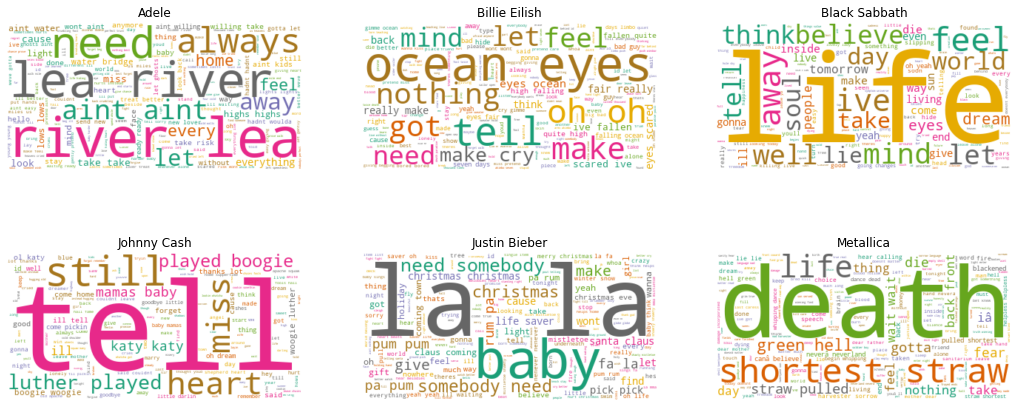

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 12]
artists = ['Adele', 'Billie Eilish', 'Black Sabbath', 'Johnny Cash', 'Justin Bieber', 'Metallica']

for index, artist in enumerate(data.columns): # print Word Cloud graph for each artist
  wc.generate(str(clean_data.text[artist]))
    
  plt.subplot(3,3, index+1)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title(artists[index])
    
plt.show()

As you can see, a lot of words appear here because of one of the songs. Now I will leave it this way, but for the future, it will be possible to remove the repetitions from each song and leave only 1 chorus.

In [90]:
unique_list = []
for artist in data.columns:
  uniques = data[artist].nonzero()[0].size # count unique words for each artist
  unique_list.append(uniques)             

data_words = pd.DataFrame(list(zip(artists, unique_list)), columns = ['artist', 'unique_words'])
data_unique = data_words.sort_values(by = 'unique_words', ascending= False)
data_unique.set_index("artist", inplace= True) 
data_unique

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


,unique_words
artist,
Metallica,861
Justin Bieber,839
Black Sabbath,706
Adele,631
Billie Eilish,582
Johnny Cash,543


In my example, Metallica had the largest vocabulary. Although I like the Metallica most of all here, I was surprised that, for example, Johnny Cash has such a weak number.

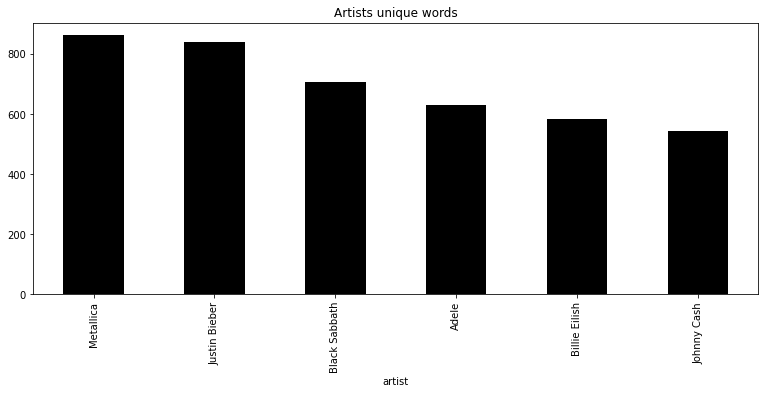

In [91]:
data_unique.plot(kind = 'bar', figsize = (13,5), title = 'Artists unique words', # piano like bar plot
                 legend = False, color='black')

#Sentiment Analysis
Here we will look at the positive and negative shades of the lyrics of each artist, as well as their subjectivity (which is meaningless regarding songs, but why not?))




In [92]:
from textblob import TextBlob # library for processing textual data

pol = lambda x: TextBlob(x).sentiment.polarity # create function to determine polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

clean_data['name'] = clean_data.index # create column with names
clean_data.reset_index(drop = True, inplace=True)

clean_data['polarity'] = clean_data.text.apply(pol) # Create a new column with the polarity of every row in the text
clean_data['subjectivity'] = clean_data.text.apply(sub) # same with subjectivity
clean_data.sort_values(by = 'polarity',ascending= True) # sorting from negative to positive


,text,name,polarity,subjectivity
5,welcome stands still leaves moon full seems change labeled mentally deranged dream thing every night freedom sight locked doors windows barred things make brain seem scarred sleep friend dream rea...,Metallica,-0.038575,0.464741
0,ill better without least sides thought knew bear drags lose mind reminded things find notes clothes youve left behind wake wake done wont rise battles dignitys become undone wont aint willing take...,Adele,0.008112,0.552353
1,true tell ive lied cryin isnt hell type let someone right maybe wont take back tryna make laugh nothing change today didnt mean night another redeye wish learned fly maybe try tell good lie didnt ...,Billie Eilish,0.016219,0.534038
2,long ago wandered mind land fairy tales stories lost happiness knew fears innocence knew illusion soon days passing years happiness didnt come easy life fairy tales daydreams innocence another wor...,Black Sabbath,0.072354,0.528685
3,got cotton bottom land growin got good stand good wife kids mine gonna get new shoes come pickin get new shoes come pickin evry night bed thank lord kids fed live beans eight days nine get em fat ...,Johnny Cash,0.085084,0.516909
4,pick pick yeah yeah pick pick pick pick thought could walk fire thought could take burn strength take higher reached point return theres turning back hearts attack gonna give everything destiny fi...,Justin Bieber,0.107244,0.552604


I am not surprised that Metallica has the most pessimistic texts, but I did not expect Adele and Billie Eilish to be more negative than Black Sabbath.

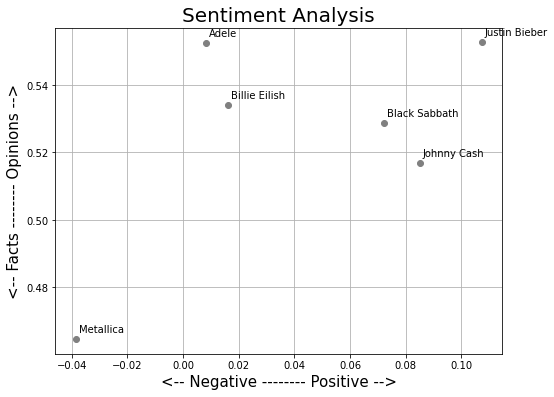

In [93]:
plt.rcParams['figure.figsize'] = [8,6]

for ind, artist in enumerate(clean_data.index):
  x = clean_data.polarity.loc[artist]
  y = clean_data.subjectivity.loc[artist]
  plt.scatter(x,y,color = 'grey')
  plt.text(x+.001, y+.002, clean_data['name'][ind], fontsize = 10)
  plt.grid(b= True)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()


As you can see, Metallica is far from all other performers. If you do not take into account the music (sound) and consider only the text, then Billie Eilish is more similar to Adele, and Johnny Cash to Black Sabbath.

In [0]:
import numpy as np
import math

def split_text(text,n = 20): # cut every text into pieces (n)
  lenght = len(text)
  size = math.floor(lenght/n)
  start = np.arange(0, lenght, size)
  split_list = []
  for p in range(n):
    split_list.append(text[start[p]:start[p]+size])
  return split_list

In [0]:
list_pieces = []
for t in clean_data.text:
  split = split_text(t)
  list_pieces.append(split)
#list_pieces #uncomment to see a wall of words

In [96]:
print('So we have: {} - elements, {} - pieces in each'.format(len(list_pieces),len(list_pieces[1])))

So we have: 6 - elements, 20 - pieces in each


In [0]:
polarity_text = []
for text in list_pieces:
  polarity_piece = []
  for p in text:
    polarity_piece.append(TextBlob(p).sentiment.polarity)
  polarity_text.append(polarity_piece)

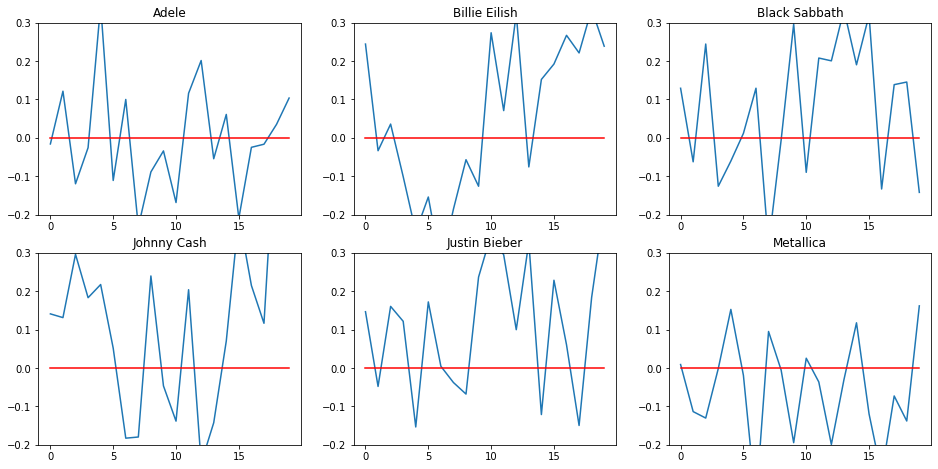

In [98]:
clean_data.set_index('name')
plt.rcParams['figure.figsize'] = [16, 12]
for index, artist in enumerate(clean_data.index):
  plt.subplot(3,3,index+1)
  plt.plot(polarity_text[index])
  plt.plot(np.arange(0,20), np.zeros(20),'r')
  plt.title(clean_data['name'][index])
  plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()


As we can see the mood of songs, each author is constantly changing. But for Metallica, it is almost always negative, for Justin Bieber is almost always positive, and for Billie Eilish in the beginning, rather negative texts, but over time they become more and more positive.

#Topic Modeling
Now for fun, we use a simple model to get a list of topics that each artist sings about. Of course, our text is not very suitable for this. There are many unnecessary repetitions here and all the songs are knocked down into one continuous text, but we do not pursue a high goal, so let's play a little with this model.

In [99]:
from gensim import matutils, models
import scipy.sparse

tdm = data
tdm.head() # look again at our vectorized data

,Adele,Billie Eilish,Black Sabbath,Johnny Cash,Justin Bieber,Metallica
absolute,0,0,0,0,0,1
absurd,0,0,0,0,0,1
abused,0,0,1,0,0,0
accident,1,0,0,0,0,0
accoutrements,0,0,0,0,1,0


In [0]:
sparse_counts = scipy.sparse.csr_matrix(tdm) # create spars matrix
corpus = matutils.Sparse2Corpus(sparse_counts) # create corpus

In [0]:
id2word = dict((v, k) for k, v in c_vectorizer.vocabulary_.items())

In [102]:
from nltk import word_tokenize, pos_tag


import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def nouns_adj(text):
    # Given a string of text, tokenize the text and pull out only the nouns and adjectives
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [103]:
data_nouns_adj = pd.DataFrame(clean_data.text.apply(nouns_adj))
data_nouns_adj

,text
0,least sides bear drags mind things notes clothes youve wake wake wont rise undone wont aint willing take risk aint willing take risk scared step lose heart fail climb forgive give heard voice toda...
1,true tell ive cryin isnt hell type someone wont tryna laugh nothing change today mean night redeye wish fly good lie didnt mean make cry wont tryna laugh nothing change today mean smile dyin fall ...
2,mind land fairy tales stories happiness knew fears innocence illusion days years easy life fairy tales innocence word illusion wheels confusion valleys tears full angry delusion everyday fears lif...
3,cotton bottom land growin good stand good wife kids mine gon new shoes pickin new shoes pickin evry night thank lord kids live beans days fat pickin get em fat come corn yellow beans high sun hot ...
4,pick pick yeah yeah pick pick pick pick thought fire thought burn strength higher point return hearts attack gon everything destiny fight fight till right whenever stay ground pick pick pick pick ...
5,stands full change deranged dream thing night freedom locked doors windows things brain seem sleep friend dream reality locked cage brain rage sanitarium sanitarium build fear whats open air thing...


In [0]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) # set the list of English stop words to avoid it

In [105]:
cvna = CountVectorizer(stop_words=stop_words, max_df=.8) # Create a Vectorizer
data_cvna = cvna.fit_transform(data_nouns_adj.text) # vectorize our data without nouns and adjectives
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = clean_data.name
data_dtmna

,absolute,absurd,accident,accoutrements,accusations,act,action,activates,adjust,admit,advent,afford,afire,afraid,age,agitationviolationmutilationplanet,agony,ah,ahyeahyeahyeahyeahyeahyeah,aight,aint,air,alight,alive,alright,alternatives,amends,angel,anger,angry,animosity,annie,answer,answers,anybody,apache,apart,apathy,arent,art,...,witchhunt,woah,wolves,woman,womb,wonder,wooah,wool,words,wore,work,worlds,worries,worship,worst,worth,worthy,woulda,wouldnt,wouldve,wounds,wow,wrist,writin,wutang,ya,ye,yeahhh,year,yellow,yes,yesterday,yo,yon,youd,young,younger,youth,youâ,zeros
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adele,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,49,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,1,1,0,0,0,3,11,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,7,15,1,0,0,0
Billie Eilish,0,0,0,0,0,1,0,0,0,0,0,1,0,3,0,0,0,1,0,0,3,0,0,4,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,...,0,0,0,0,0,2,0,0,0,1,0,2,0,0,1,2,0,0,2,1,0,0,1,0,0,0,0,0,2,0,1,1,0,0,6,1,0,0,0,0
Black Sabbath,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,3,1,0,0,0,0,0,0,...,0,0,0,3,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
Johnny Cash,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,1,4,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,1,1,0,0,0,2,0,0,0,0,0
Justin Bieber,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,2,1,1,1,15,0,0,0,3,1,0,2,0,1,0,1
Metallica,1,1,0,0,1,0,1,0,0,0,0,0,2,0,0,1,1,0,0,0,3,2,2,0,0,1,0,0,2,0,1,0,0,0,0,0,0,1,1,1,...,4,0,1,0,0,0,0,0,7,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0


In [0]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [107]:
ldana = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=80) # let's look on only 6 main topics (you can play with this number)
ldana.print_topics()

[(0,
  '0.018*"hell" + 0.013*"green" + 0.012*"death" + 0.012*"shortest" + 0.012*"straw" + 0.009*"lie" + 0.008*"justice" + 0.008*"end" + 0.007*"fear" + 0.006*"dead"'),
 (1,
  '0.052*"christmas" + 0.033*"somebody" + 0.026*"pum" + 0.021*"pa" + 0.020*"mistletoe" + 0.014*"pick" + 0.013*"santa" + 0.013*"rum" + 0.010*"year" + 0.010*"claus"'),
 (2,
  '0.039*"ocean" + 0.026*"bad" + 0.019*"guy" + 0.012*"everybody" + 0.011*"high" + 0.008*"limbo" + 0.007*"guess" + 0.007*"pretend" + 0.007*"lie" + 0.007*"die"'),
 (3,
  '0.001*"hell" + 0.001*"aint" + 0.001*"death" + 0.001*"somebody" + 0.001*"green" + 0.001*"river" + 0.001*"lie" + 0.001*"christmas" + 0.001*"lea" + 0.001*"end"'),
 (4,
  '0.028*"aint" + 0.018*"river" + 0.016*"lea" + 0.013*"katy" + 0.013*"ready" + 0.010*"hadnt" + 0.009*"lights" + 0.009*"lows" + 0.009*"highs" + 0.009*"young"'),
 (5,
  '0.001*"christmas" + 0.001*"somebody" + 0.001*"hell" + 0.001*"ocean" + 0.001*"pum" + 0.001*"aint" + 0.001*"mistletoe" + 0.001*"high" + 0.001*"girl" + 0.001*

In [108]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(4, 'Adele'),
 (2, 'Billie Eilish'),
 (0, 'Black Sabbath'),
 (4, 'Johnny Cash'),
 (1, 'Justin Bieber'),
 (0, 'Metallica')]

In [113]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=300)
ldana.print_topics()

[(0,
  '0.023*"christmas" + 0.016*"aint" + 0.016*"somebody" + 0.011*"pum" + 0.010*"ocean" + 0.009*"pa" + 0.009*"river" + 0.009*"mistletoe" + 0.008*"bad" + 0.008*"lea"'),
 (1,
  '0.012*"hell" + 0.008*"green" + 0.008*"death" + 0.008*"katy" + 0.008*"straw" + 0.008*"shortest" + 0.006*"lie" + 0.006*"end" + 0.005*"justice" + 0.005*"goodbye"')]

In [114]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'Adele'),
 (0, 'Billie Eilish'),
 (1, 'Black Sabbath'),
 (1, 'Johnny Cash'),
 (0, 'Justin Bieber'),
 (1, 'Metallica')]

That's all for now. Thank you for your attention, if you have questions, please contact me by e-mail: morozowi5@gmail.com